In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import itertools

from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
from wordcloud import STOPWORDS
import string
import nltk
from nltk.corpus import stopwords
#nltk.download('stopwords')
from nltk.stem import WordNetLemmatizer
#nltk.download('wordnet')

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
from sklearn.feature_extraction import text
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, GridSearchCV
from sklearn.linear_model import SGDClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
import warnings
warnings.filterwarnings('ignore')

## Step 1: Extracting word features and show Exploratory Data Analysis (EDA)

The first step is to extract word features and conduct Exploratory Data Analysis (EDA), which involves inspecting, visualizing, and cleaning the data. Here is a step-by-step breakdown of the EDA process:

1. Download the datasets from Kaggle and load them from the local folder.

2. Check the metrics of all three CSV files, such as the size of the datasets and the presence of null values.

3. Create a histogram to identify the categories present in the data.

4. Generate a wordcloud of the training set to visualize the most commonly occurring words.

5. Clean the texts by performing the following actions:
    * Convert all words to lower case.

    * Remove all punctuation.

    * Remove all digits.

    * Eliminate unnecessary spaces.

    * Remove stopwords.


6. Tokenize and lemmatize all the texts in the training dataset using the nltk library.

7. Apply the TF-IDF method to convert the texts into a matrix form. This involves using the sklearn TfidfVectorizer function, which calculates the TF-IDF score for every word in the corpus relative to the document/row and puts that information into a vector.


In [2]:
data = pd.read_csv("BBC News Sample Solution.csv")
train = pd.read_csv("BBC News Train.csv")
test = pd.read_csv("BBC News Test.csv")

In [3]:
data.head()

,ArticleId,Category
0,1018,sport
1,1319,tech
2,1138,business
3,459,entertainment
4,1020,politics


In [4]:
data.describe()

,ArticleId
count,735.000000
mean,1099.424490
std,643.925514
min,1.000000
25%,545.500000
50%,1116.000000
75%,1657.500000
max,2225.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 735 entries, 0 to 734
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ArticleId  735 non-null    int64 
 1   Category   735 non-null    object
dtypes: int64(1), object(1)
memory usage: 11.6+ KB


In [6]:
train.head()

,ArticleId,Text,Category
0,1833,worldcom ex-boss launches defence lawyers defe...,business
1,154,german business confidence slides german busin...,business
2,1101,bbc poll indicates economic gloom citizens in ...,business
3,1976,lifestyle governs mobile choice faster bett...,tech
4,917,enron bosses in $168m payout eighteen former e...,business


In [7]:
train.describe()

,ArticleId
count,1490.000000
mean,1119.696644
std,641.826283
min,2.000000
25%,565.250000
50%,1112.500000
75%,1680.750000
max,2224.000000


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1490 entries, 0 to 1489
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ArticleId  1490 non-null   int64 
 1   Text       1490 non-null   object
 2   Category   1490 non-null   object
dtypes: int64(1), object(2)
memory usage: 35.0+ KB


In [9]:
test.head()

,ArticleId,Text
0,1018,qpr keeper day heads for preston queens park r...
1,1319,software watching while you work software that...
2,1138,d arcy injury adds to ireland woe gordon d arc...
3,459,india s reliance family feud heats up the ongo...
4,1020,boro suffer morrison injury blow middlesbrough...


In [10]:
test.describe()

,ArticleId
count,735.000000
mean,1099.424490
std,643.925514
min,1.000000
25%,545.500000
50%,1116.000000
75%,1657.500000
max,2225.000000


In [11]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 735 entries, 0 to 734
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ArticleId  735 non-null    int64 
 1   Text       735 non-null    object
dtypes: int64(1), object(1)
memory usage: 11.6+ KB


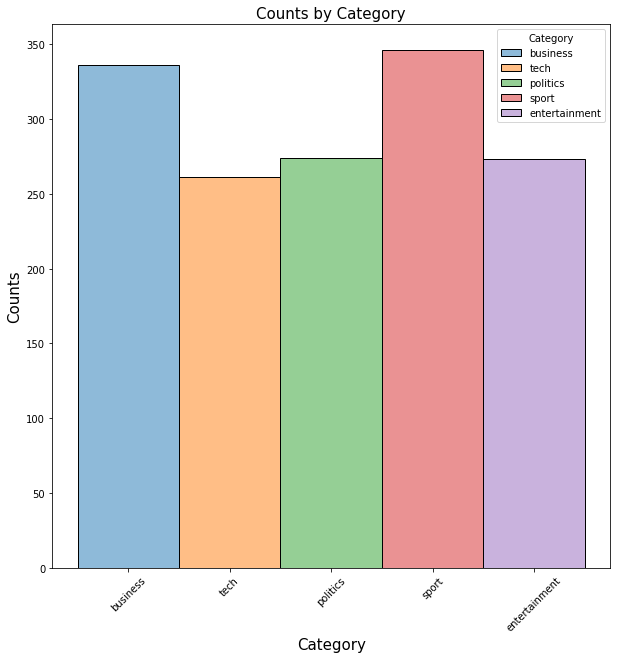

In [12]:
plt.figure(figsize=(10, 10))
sns.histplot(data = train, x= 'Category', hue = 'Category')
plt.xlabel('Category', fontsize = 15)
plt.ylabel('Counts', fontsize = 15)
plt.title('Counts by Category', fontsize = 15)
plt.xticks(fontsize = 10, horizontalalignment = 'center', rotation = 45)
plt.yticks(fontsize = 10)
plt.show()

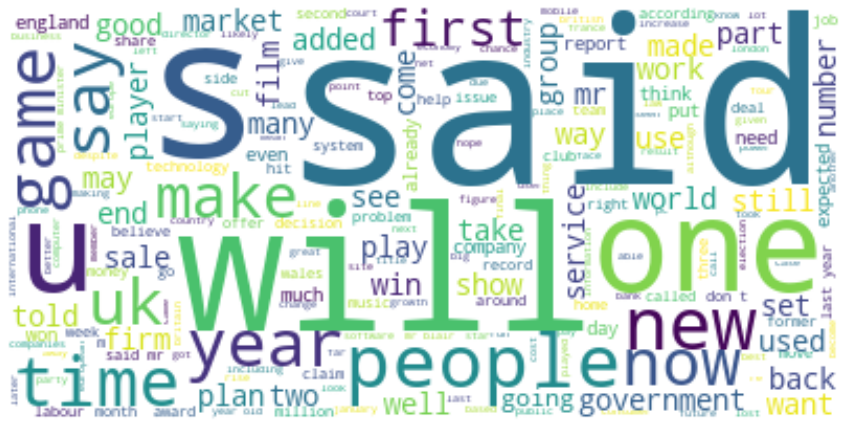

In [13]:
text = " ".join(i for i in train.Text)
wordcloud = WordCloud(background_color="white").generate(text)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [14]:
def cleaning(text):
    w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
    lemmatizer = nltk.stem.WordNetLemmatizer()
    text_cleaned = text.str.lower()
    text_cleaned = text.map(lambda x: x.translate(str.maketrans('', '', string.punctuation)))
    text_cleaned = text.str.replace('\d+', '')
    text_cleaned = text.str.strip()
    text_cleaned = stop_words = set(stopwords.words('english'))
    text_cleaned = text.apply(
        lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
    return text_cleaned

In [15]:
def lemmatize_text(text):
    w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
    lemmatizer = nltk.stem.WordNetLemmatizer()
    return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]

In [16]:
train['cleaned'] = cleaning(train['Text'])
train['cleaned'] = train['cleaned'].apply(lemmatize_text)
train['cleaned'] = train['cleaned'].apply(lambda x: ' '.join(x))
train

,ArticleId,Text,Category,cleaned
0,1833,worldcom ex-boss launches defence lawyers defe...,business,worldcom ex-boss launch defence lawyer defendi...
1,154,german business confidence slides german busin...,business,german business confidence slide german busine...
2,1101,bbc poll indicates economic gloom citizens in ...,business,bbc poll indicates economic gloom citizen majo...
3,1976,lifestyle governs mobile choice faster bett...,tech,lifestyle governs mobile choice faster better ...
4,917,enron bosses in $168m payout eighteen former e...,business,enron boss $168m payout eighteen former enron ...
...,...,...,...,...
1485,857,double eviction from big brother model caprice...,entertainment,double eviction big brother model caprice holb...
1486,325,dj double act revamp chart show dj duo jk and ...,entertainment,dj double act revamp chart show dj duo jk joel...
1487,1590,weak dollar hits reuters revenues at media gro...,business,weak dollar hit reuters revenue medium group r...
1488,1587,apple ipod family expands market apple has exp...,tech,apple ipod family expands market apple expande...


## Step 2: Building and training models
The second step involves building and training models. Here is a summary of the actions taken during this phase:

1. Developed a function for determining the best label permutations based on accuracy score.
2. Created a function for predicting the category based on the maximum value of the fitted matrix.
3. Developed a function to identify the optimal combination of parameters for the NMF model, based on accuracy score.
4. Used the training set for matrix factorization, instead of combining it with the testing set, to determine which dataset produced the best results. The training set produced a high accuracy score, while the testing set did not, possibly due to the fact that the training set contained twice as many documents.
5. Printed a list of the top words used for each topic to confirm that the topics were correctly assigned.
6. Achieved an accuracy rate of over 92% for the training dataset and generated a confusion matrix for visual inspection.

In [17]:
def labels(data, yp, n=5):
    nlist = list(range(n))
    cat = ['tech', 'politics', 'entertainment', 'sport', 'business']
    d = [dict(zip(key, nlist)) for key in itertools.permutations(cat, len(nlist))]
    accuracy_scores = []
    for i in range(len(d)):
        label = data.replace({'Category': d[i]})
        label = list(label['Category'])
        accuracy_scores.append(accuracy_score(label, yp))
    label_list = data.replace({"Category": d[np.argmax(accuracy_scores)]})
    label_list = list(label_list['Category'])
    return d[np.argmax(accuracy_scores)], max(accuracy_scores), label_list

In [18]:
def best_model(data):    
    vec = TfidfVectorizer(stop_words = 'english')
    X = vec.fit_transform(data['cleaned'])
    scores = 0
    best_comb = []
    comb = [['random', 'cd', 'frobenius'],
             ['random', 'mu', 'frobenius'],
             ['random', 'mu', 'kullback-leibler'],
             ['nndsvd', 'cd', 'frobenius'],
             ['nndsvd', 'mu', 'frobenius'],
             ['nndsvd', 'mu', 'kullback-leibler'],
             ['nndsvda', 'cd', 'frobenius'],
             ['nndsvda', 'mu', 'frobenius'],
             ['nndsvda', 'mu', 'kullback-leibler'],
             ['nndsvdar', 'cd', 'frobenius'],
             ['nndsvdar', 'mu', 'frobenius'],
             ['nndsvdar', 'mu', 'kullback-leibler']]
    for model in range(len(comb)):
        nmf_model = NMF(n_components=5, init=comb[model][0], solver = comb[model][1],
                        beta_loss = comb[model][2])
        nmf_model.fit(X)
        nmf_features = nmf_model.transform(X)
        predictions = get_predictions(nmf_features)
        label, score, label_list = labels(data, predictions)
        if score > scores:
            scores = score
            best_comb = comb[model]
    return best_comb, scores

In [19]:
def get_predictions(nmf_feat):
    pred_lst = []
    for i in range(len(nmf_feat)):
        pred = pd.DataFrame(nmf_feat).loc[i].idxmax()
        pred_lst.append(pred)
    return pred_lst

In [20]:
bm = best_model(train)

In [21]:
print("The best combination of parameters to use are:", bm[0], "with an accuracy of", bm[1])

The best combination of parameters to use are: ['nndsvdar', 'mu', 'kullback-leibler'] with an accuracy of 0.9261744966442953


In [22]:
vec = TfidfVectorizer(stop_words = 'english')
X1 = vec.fit_transform(train['cleaned'])
model1 = NMF(n_components=5, init=bm[0][0], solver = bm[0][1],
                        beta_loss = bm[0][2])
model1.fit(X1)
features1 = model1.transform(X1)
predictions1 = get_predictions(features1)

In [23]:
labels1 = labels(train, predictions1, n=5)

In [25]:
best_index1 = []
for key in labels1[0]:
    best_index1.append(key)
components_df1 = pd.DataFrame(model1.components_, index= best_index1, columns=vec.get_feature_names())
components_df1

,00,000,0001,000bn,000m,000th,001,001and,001st,0051,...,zone,zonealarm,zoom,zooms,zooropa,zorro,zuluaga,zurich,zutons,zvonareva
tech,0.001237,0.098034,0.001453,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.001297,...,0.005045,0.001015,0.004169,0.002862,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
politics,0.001723,0.076984,0.000000,0.000000,0.00000,0.000000,0.002967,0.001484,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
entertainment,0.000000,0.052766,0.000000,0.000000,0.00000,0.007884,0.000000,0.000000,0.003191,0.000000,...,0.001708,0.000000,0.000000,0.000000,0.001736,0.003855,0.000000,0.000000,0.003381,0.000000
sport,0.001253,0.018445,0.000000,0.000000,0.04344,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.007395,0.000000,0.000000,0.000000,0.000000,0.000000,0.000974,0.010673,0.000000,0.006998
business,0.000000,0.109151,0.000000,0.002746,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.010182,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002163,0.000000,0.000000


In [26]:
for topic in range(len(list(components_df1.index))):
    tmp1 = components_df1.loc[list(components_df1.index)[topic]]
    print(f'For topic {list(components_df1.index)[topic]} the words with the highest value are:')
    print(tmp1.nlargest(10))
    print('\n')

For topic tech the words with the highest value are:
mobile        0.384917
phone         0.342126
said          0.340449
people        0.329399
technology    0.268655
music         0.261797
service       0.250369
game          0.234507
software      0.233629
user          0.228935
Name: tech, dtype: float64


For topic politics the words with the highest value are:
mr            0.530636
election      0.381261
labour        0.377971
said          0.366302
blair         0.332434
party         0.324624
government    0.293893
minister      0.268189
tory          0.259908
brown         0.240550
Name: politics, dtype: float64


For topic entertainment the words with the highest value are:
film        0.720523
award       0.396509
best        0.364066
star        0.277624
actor       0.235431
band        0.230165
oscar       0.211763
album       0.191324
year        0.189897
festival    0.174625
Name: entertainment, dtype: float64


For topic sport the words with the highest value are:
game

In [31]:
confusion_matrix(labels1[2], predictions1)

array([[254,   2,   3,   1,   1],
       [ 12, 252,   3,   0,   7],
       [ 45,   1, 226,   0,   1],
       [  0,   0,   2, 343,   1],
       [ 21,  10,   1,   1, 303]], dtype=int64)

In [32]:
test['cleaned'] = cleaning(test['Text'])
test['cleaned'] = test['cleaned'].apply(lemmatize_text)
test['cleaned'] = test['cleaned'].apply(lambda x: ' '.join(x))
test['Category'] = data['Category']
test

,ArticleId,Text,cleaned,Category
0,1018,qpr keeper day heads for preston queens park r...,qpr keeper day head preston queen park ranger ...,sport
1,1319,software watching while you work software that...,software watching work software monitor every ...,tech
2,1138,d arcy injury adds to ireland woe gordon d arc...,arcy injury add ireland woe gordon arcy ruled ...,business
3,459,india s reliance family feud heats up the ongo...,india reliance family feud heat ongoing public...,entertainment
4,1020,boro suffer morrison injury blow middlesbrough...,boro suffer morrison injury blow middlesbrough...,politics
...,...,...,...,...
730,1923,eu to probe alitalia state aid the european ...,eu probe alitalia state aid european commissio...,sport
731,373,u2 to play at grammy awards show irish rock ba...,u2 play grammy award show irish rock band u2 p...,tech
732,1704,sport betting rules in spotlight a group of mp...,sport betting rule spotlight group mp peer cal...,business
733,206,alfa romeos to get gm engines fiat is to sto...,alfa romeo get gm engine fiat stop making six-...,entertainment


In [33]:
bm2 = best_model(test)

In [34]:
print("The best combination of parameters to use are:", bm2[0], "with an accuracy of", bm2[1])

The best combination of parameters to use are: ['random', 'cd', 'frobenius'] with an accuracy of 0.25170068027210885


## Step 3: Compare with supervised learning

The third step involves comparing with supervised learning. Here are the steps taken during this phase:

1. Utilized the SGD Classifier from the sklearn library to determine the mean cross-validation score of the predictions.
2. Examined the mean cross-validation scores for four different dataset sizes: 10%, 20%, 50%, and 100%.
3. Discovered that the best result was achieved with 10% of the dataset, with a score of 98%, followed by 97% with the full dataset.
4. Concluded that supervised learning generated the best results and 10% of the dataset is the optimal choice. Overfitting does not appear to be an issue.

In [35]:
X_train, X_test, y_train, y_test = train_test_split(train['cleaned'], train['Category'], test_size=0.2, random_state=1)

In [36]:
print(f'Train dimensions: {X_train.shape, y_train.shape}')
print(f'Test dimensions: {X_test.shape, y_test.shape}')
print(y_train.value_counts())
print(y_test.value_counts())

Train dimensions: ((1192,), (1192,))
Test dimensions: ((298,), (298,))
sport            279
business         268
politics         221
entertainment    218
tech             206
Name: Category, dtype: int64
business         68
sport            67
entertainment    55
tech             55
politics         53
Name: Category, dtype: int64


In [37]:
vect = TfidfVectorizer()
X_train_tfidf = vect.fit_transform(X_train)
X_train_tfidf.shape

(1192, 21276)

In [38]:
sgd_model = SGDClassifier(random_state=1)
sgd_model_scores = cross_val_score(sgd_model, X_train_tfidf, y_train, cv=5)
print("SGD Classifier returned a mean cross validation score of:", sgd_model_scores.mean(), 
      "with standard deviation of:", sgd_model_scores.std())

SGD Classifier returned a mean cross validation score of: 0.9739882563904223 with standard deviation of: 0.009720456692425076


In [39]:
sgd_model_pred = cross_val_predict(sgd_model, X_train_tfidf, y_train, cv=5)
confusion_matrix(y_train, sgd_model_pred)

array([[261,   0,   4,   0,   3],
       [  0, 211,   4,   1,   2],
       [  8,   1, 210,   0,   2],
       [  1,   0,   1, 277,   0],
       [  1,   2,   0,   1, 202]], dtype=int64)

In [40]:
X_train_10percent = X_train[:119,]
y_train_10percent = y_train[:119,]
X_train_10percent_tfidf = vect.fit_transform(X_train_10percent)
sgd_model_scores_10percent = cross_val_score(sgd_model, X_train_10percent_tfidf, y_train_10percent, cv=5)
print("SGD Classifier returned a mean cross validation score of:", sgd_model_scores_10percent.mean(), 
      "with standard deviation of:", sgd_model_scores_10percent.std())

SGD Classifier returned a mean cross validation score of: 0.9833333333333334 with standard deviation of: 0.020412414523193135


In [41]:
sgd_model_pred_10percent = cross_val_predict(sgd_model, X_train_10percent_tfidf, y_train_10percent, cv=5)
confusion_matrix(y_train_10percent, sgd_model_pred_10percent)

array([[24,  0,  0,  0,  1],
       [ 0, 22,  0,  0,  0],
       [ 0,  0, 25,  0,  0],
       [ 0,  0,  0, 26,  0],
       [ 0,  0,  0,  1, 20]], dtype=int64)

In [42]:
X_train_20percent = X_train[:238,]
y_train_20percent = y_train[:238,]
X_train_20percent_tfidf = vect.fit_transform(X_train_20percent)
sgd_model_scores_20percent = cross_val_score(sgd_model, X_train_20percent_tfidf, y_train_20percent, cv=5)
print("SGD Classifier returned a mean cross validation score of:", sgd_model_scores_20percent.mean(), 
      "with standard deviation of:", sgd_model_scores_20percent.std())

SGD Classifier returned a mean cross validation score of: 0.9495567375886524 with standard deviation of: 0.0392665452564834


In [43]:
sgd_model_pred_20percent = cross_val_predict(sgd_model, X_train_20percent_tfidf, y_train_20percent, cv=5)
confusion_matrix(y_train_20percent, sgd_model_pred_20percent)

array([[41,  0,  3,  0,  4],
       [ 0, 40,  1,  0,  1],
       [ 0,  0, 43,  1,  1],
       [ 0,  0,  0, 59,  0],
       [ 0,  0,  0,  1, 43]], dtype=int64)

In [44]:
X_train_50percent = X_train[:596,]
y_train_50percent = y_train[:596,]
X_train_50percent_tfidf = vect.fit_transform(X_train_50percent)
sgd_model_scores_50percent = cross_val_score(sgd_model, X_train_50percent_tfidf, y_train_50percent, cv=5)
print("SGD Classifier returned a mean cross validation score of:", sgd_model_scores_50percent.mean(), 
      "with standard deviation of:", sgd_model_scores_50percent.std())

SGD Classifier returned a mean cross validation score of: 0.9630812324929972 with standard deviation of: 0.01731482193030851


In [45]:
sgd_model_pred_50percent = cross_val_predict(sgd_model, X_train_50percent_tfidf, y_train_50percent, cv=5)
confusion_matrix(y_train_50percent, sgd_model_pred_50percent)

array([[117,   0,   3,   1,   2],
       [  0, 110,   2,   0,   1],
       [  4,   0, 102,   2,   1],
       [  0,   0,   0, 137,   0],
       [  2,   2,   1,   1, 108]], dtype=int64)

## Conclusion:

In conclusion, this project involved conducting an analysis of a text dataset by extracting word features, performing exploratory data analysis, building and training models, and comparing supervised and unsupervised learning. The analysis identified the most frequently occurring words and categories present in the data, cleaned and tokenized the texts, and leveraged matrix factorization and a support vector machine classifier to generate predictions and measure accuracy. The results demonstrated that unsupervised learning using the NMF model was able to achieve a high accuracy rate of over 92% for the training dataset, and the supervised learning approach using the SGD classifier produced even better results with a mean cross-validation score of 98% using 10% of the data. Overall, this project provides valuable insights into how text data can be analyzed and utilized for predictive modeling purposes.

Sources:

https://www.capitalone.com/tech/machine-learning/understanding-tf-idf/

https://www.analyticsvidhya.com/blog/2021/06/text-preprocessing-in-nlp-with-python-codes/
